# Observable Consequences of the Zero-Point Energy Vacuum Fluctuations

This notebook will summarise the theoretical foundations that lead to the non-zero Zero-Point Energy (ZPE), and the vacuum fluctuations, as we saw in class. We will also go through some of the observable phenomena that arise from this, and try to visualise them

In [1]:
# Quantum Vacuum Phenomena: Zero-Point Energy and Observable Effects
# ================================================================
# This notebook illustrates the concept of zero-point energy, vacuum fluctuations,
# and the physical effects that arise from them:
# - Lamb Shift
# - Spontaneous Emission
# - Casimir Effect

import numpy as np
import matplotlib.pyplot as plt

# Improve plot aesthetics
plt.style.use("seaborn-v0_8-whitegrid")

---
## 1. ZPE

In quantum mechanics, every harmonic oscillator has a lowest possible energy:

$$E_0 = \frac{1}{2} \hbar \omega,$$
not $E_0 = 0$.

In a quantized electromagnetic field, each mode of the field (each independent frequency and wavevector) is interpreted as one of these harmonic oscillators.
So, even in the vacuum state ($0$th number state, no photons expected at all):

$$E_{\text{vacuum}} = \sum_{\mathbf{k},\lambda} \tfrac{1}{2}\hbar \omega_{\mathbf{k}}.$$

This is called zero-point energy — the field has a residual energy even when “empty”. Considering the most general case can have an infinite number of modes, this can lead to the absurd $E_{\text{vacuum}}\rightarrow\infty$.

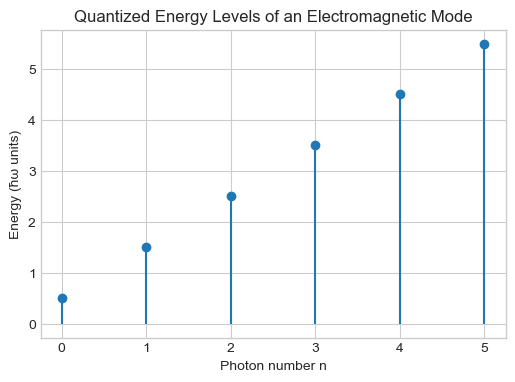

In [3]:
# Each EM mode behaves like a harmonic oscillator with quantized energy levels
n = np.arange(0, 6)
E = (n + 0.5)

plt.figure(figsize=(6,4))
plt.stem(n, E, basefmt=" ")
plt.xlabel("Photon number n")
plt.ylabel("Energy (ħω units)")
plt.title("Quantized Energy Levels of an Electromagnetic Mode")
plt.show()

---
## 2. Vacuum fluctuations

Zero-point energy isn't just an abstract number.
It implies that the field’s observables (electric and magnetic fields) fluctuate around zero:
$$\langle 0 | \mathbf{E} | 0 \rangle = 0, \quad
\langle 0 | \mathbf{E}^2 | 0 \rangle \neq 0$$

That means:
- Even in total darkness, the field is never completely still — it jitters with random quantum fluctuations.
- These fluctuations are not detectable directly (since only differences in energy matter), but they affect how matter behaves.

You can think of the vacuum as a restless medium — not filled with particles, but with potential for energy exchange.


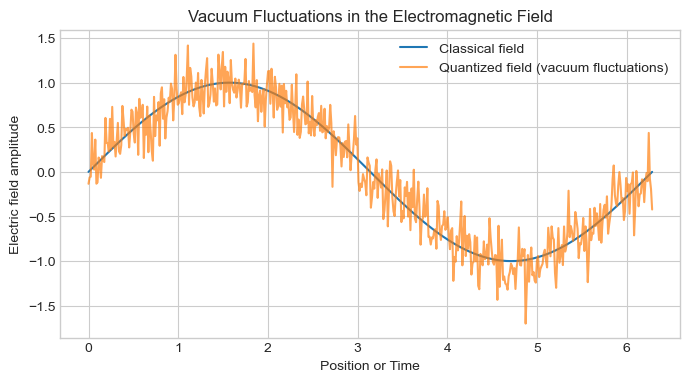

In [5]:
# Visualizing vacuum fluctuations in the electric field
x = np.linspace(0, 2*np.pi, 500)
vac_fluct = 0.2*np.random.randn(len(x))  # small random jitter
E_classical = np.sin(x)
E_quantum = np.sin(x) + vac_fluct

plt.figure(figsize=(8,4))
plt.plot(x, E_classical, label="Classical field")
plt.plot(x, E_quantum, label="Quantized field (vacuum fluctuations)", alpha=0.7)
plt.xlabel("Position or Time")
plt.ylabel("Electric field amplitude")
plt.legend()
plt.title("Vacuum Fluctuations in the Electromagnetic Field")
plt.show()

---
## 3. Observable consequences of Vacuum Fluctuations

### 🐑 A: The lamb shift

**Phenomenon**:
In hydrogen, the $2S_{1/2}$ and $2P_{1/2}$ levels should be degenerate (same energy) according to Dirac’s theory — but experimentally, they’re split by about 1058 MHz.

**Quantum explanation**:
- The electron in the atom is coupled to the quantized EM field.
- Even in vacuum, the field fluctuates.
- These vacuum fluctuations slightly “shake” the electron, altering the self-energy of the bound states.
- The effect depends on the shape of the electron’s wavefunction:
the s-orbitals (which penetrate the nucleus) are affected differently than p-orbitals.

**Consequence**: Vacuum fluctuations effectively cause the electron to constantly “wiggle,” slightly renormalizing its energy — producing **the Lamb shift**.

**Further notes**: 
- Later in unit 4, we will introduce Stark Shift, which has a similar effect in a controlled manner. 
- This phenomenon was experimentally observed in the 1940s.

💡 *Analogy*: The vacuum acts like a noisy background that slightly blurs the atomic energy landscape.


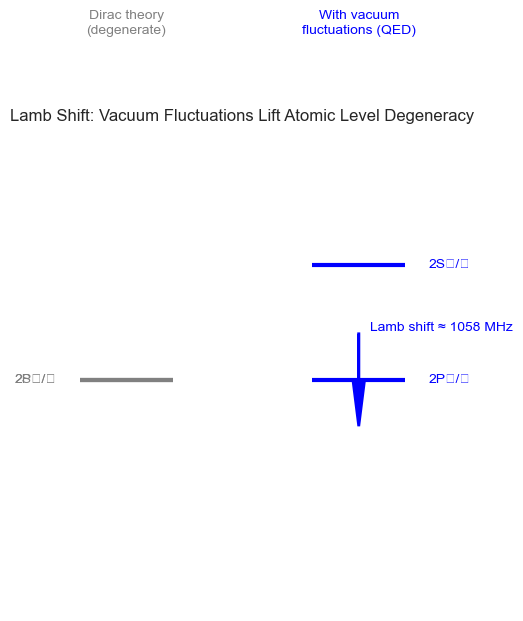

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Energy levels (arbitrary units)
E_P_dirac = 10.0
E_S_dirac = 10.0
E_P_QED = 10.0
E_S_QED = 10.05  # shifted upward

# Plot Dirac levels (gray)
plt.hlines(E_P_dirac, 0.8, 1.2, color='gray', lw=3)
plt.hlines(E_S_dirac, 0.8, 1.2, color='gray', lw=3)
plt.text(0.7, E_P_dirac, "2P₁/₂", va='center', ha='right', color='gray')
plt.text(0.7, E_S_dirac, "2S₁/₂", va='center', ha='right', color='gray')
plt.text(1.0, 10.15, "Dirac theory\n(degenerate)", ha='center', color='gray')

# Plot QED-corrected levels (blue)
plt.hlines(E_P_QED, 1.8, 2.2, color='blue', lw=3)
plt.hlines(E_S_QED, 1.8, 2.2, color='blue', lw=3)
plt.text(2.3, E_P_QED, "2P₁/₂", va='center', ha='left', color='blue')
plt.text(2.3, E_S_QED, "2S₁/₂", va='center', ha='left', color='blue')
plt.text(2.0, 10.15, "With vacuum\nfluctuations (QED)", ha='center', color='blue')

# Draw arrow showing Lamb shift
plt.arrow(2.0, E_S_QED - 0.03, 0, -0.02, 
          head_width=0.05, head_length=0.02, color='blue', lw=2)
plt.text(2.05, 10.02, "Lamb shift ≈ 1058 MHz", va='bottom', color='blue')

# Formatting
plt.xlim(0.5, 2.5)
plt.ylim(9.9, 10.1)
plt.axis('off')
plt.title("Lamb Shift: Vacuum Fluctuations Lift Atomic Level Degeneracy", pad=20)
plt.show()

### 💡 B. Spontaneous Emission

**Phenomenon**:
An excited atom will decay and emit a photon, even in perfect vacuum — with no external trigger.

**Quantum explanation**:
- Classically, an atom needs a field to stimulate emission.
- In quantum electrodynamics, the vacuum field itself provides the trigger.
- The zero-point fluctuations of the EM field drive a transition between the excited and ground state, producing a real photon.

Formally, the transition rate (via Fermi’s golden rule) depends on the vacuum spectral density:
$$\Gamma \propto |\langle g,1_{\mathbf{k}}| \hat{H}_{\text{int}} | e,0 \rangle|^2$$
Even when there are no real photons, the interaction with the vacuum mode $|0\rangle$ yields a finite rate.

**Consequence**: Spontaneous emission is stimulated by the vacuum itself.

💡 *Analogy*: The atom sits in a sea of jittering electromagnetic fluctuations — one of those fluctuations “pushes” it into emitting a photon.

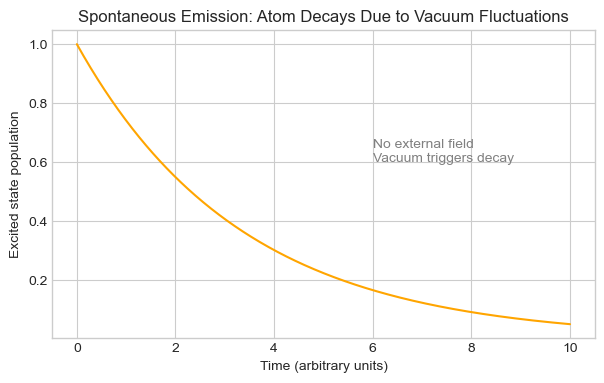

In [7]:
# Conceptual visualization of an excited atom decaying by vacuum fluctuations
t = np.linspace(0, 10, 500)
excited = np.exp(-0.3*t)  # decay curve

plt.figure(figsize=(7,4))
plt.plot(t, excited, color='orange')
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Excited state population")
plt.title("Spontaneous Emission: Atom Decays Due to Vacuum Fluctuations")
plt.text(6, 0.6, "No external field\nVacuum triggers decay", fontsize=10, color='gray')
plt.show()

### 🍽️ C. The Casimir Effect

**Phenomenon**:
Two uncharged, perfectly conducting plates in vacuum attract each other, even with no external field.

**Quantum explanation**:
- The plates impose boundary conditions on the allowed electromagnetic modes.
- Some wavelengths can’t exist between the plates, so the vacuum energy density between the plates differs from that outside.
- The result is a net pressure pushing the plates together.

Mathematically, it’s the difference in zero-point energy:
$$F/A = -\frac{\pi^2 \hbar c}{240\, a^4}$$
where a is the plate separation.

**Consequence**:
The Casimir force arises because vacuum fluctuations are modified by geometry — fewer modes means lower energy, so nature pulls the plates together to minimize total energy.

💡 *Analogy*: The vacuum is like a vibrating drumhead — changing its boundaries shifts its resonant frequencies, altering the pressure on the walls.

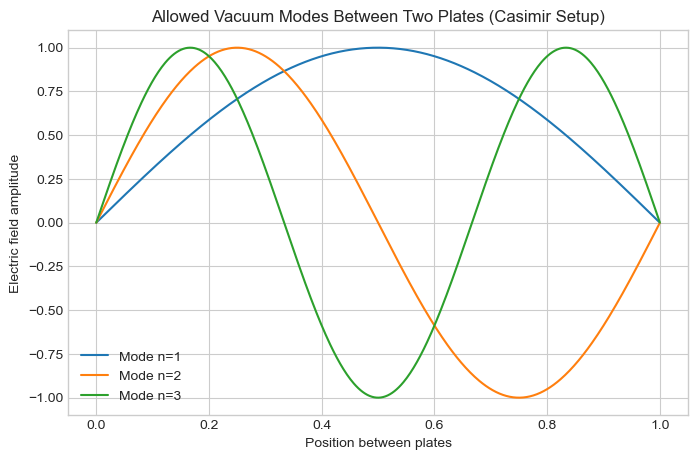

In [8]:
# Comparing allowed modes between two plates vs free space
a = 1.0  # plate separation
x = np.linspace(0, a, 500)

# Allowed standing wave modes between plates (illustrative)
modes = [1, 2, 3]
plt.figure(figsize=(8,5))
for n in modes:
    plt.plot(x, np.sin(n*np.pi*x/a), label=f"Mode n={n}")
plt.xlabel("Position between plates")
plt.ylabel("Electric field amplitude")
plt.title("Allowed Vacuum Modes Between Two Plates (Casimir Setup)")
plt.legend()
plt.show()

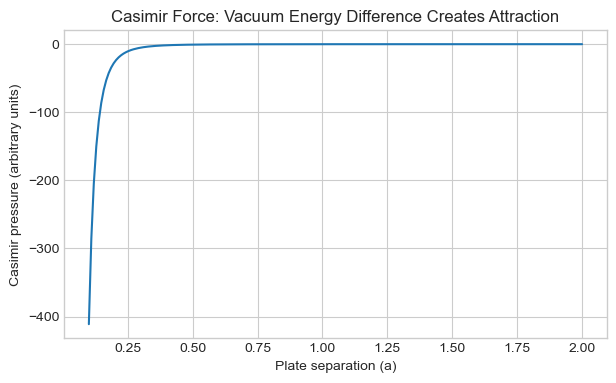

In [9]:
# Casimir force dependence on separation
a_vals = np.linspace(0.1, 2, 200)
F = -np.pi**2/(240*a_vals**4)  # normalized units

plt.figure(figsize=(7,4))
plt.plot(a_vals, F)
plt.xlabel("Plate separation (a)")
plt.ylabel("Casimir pressure (arbitrary units)")
plt.title("Casimir Force: Vacuum Energy Difference Creates Attraction")
plt.show()

--- 
## 4. Summary Table




| Phenomenon | What Changes | Origin | Observable Effect |
|-------------|--------------|--------|------------------|
| **Zero-point energy** | Ground state energy of EM field | Quantization of field modes | Nonzero vacuum energy |
| **Lamb shift** | Atomic energy levels | Electron interacts with vacuum fluctuations | GHz-level energy correction |
| **Spontaneous emission** | Atomic transition rate | Vacuum fluctuations stimulate decay | Finite excited-state lifetime |
| **Casimir effect** | Geometry of vacuum modes | Mode restriction changes vacuum energy density | Attractive force between plates |

**In short:**  
Even the quantum vacuum "hums" with invisible fluctuations — and matter and boundaries feel their effects.
